In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## INPUT ##
mu = 3e-8
dem_file = "teo_LR_dem.txt"

In [3]:
tag = []
ms_cmd = []

with open(dem_file, "r") as demF:
    for line in demF:
        if line[:4] == "./ms":
            ms_cmd.append(line.strip())
            tag.append(lab_buf)
            continue
        lab_buf = line.strip()

In [6]:
print(len(tag), len(ms_cmd))
tag

13 13


['Teo_Los_Guajes',
 'Teo_Crucero_Lagunitas',
 'Teo_Amatlan_de_Canas',
 'Teo_San_Lorenzo',
 'Teo_El_Rodeo',
 'Teo_Palmar_Chico',
 'Teo_random',
 'LR_Amatlan_de_Canas',
 'LR_San_Lorenzo',
 'LR_Crucero_Lagunitas',
 'LR_Los_Guajes',
 'LR_Palmar_Chico',
 'LR_random']

In [12]:
def parse_msCmd(ms_cmd):
    cmd_ls = ms_cmd.split()
    ## PARSE PARAMETERS ##
    size_loc = int(cmd_ls[7])
    #print("Size of locus:", size_loc, "bp")
    
    N_0 = round(float(cmd_ls[4])/(4*mu*size_loc))
    #print("Current N_e:", N_0)
    
    #rho = float(cmd_ls[6])/(4*N_0*size_loc)
    rho = mu*float(cmd_ls[6])/float(cmd_ls[4])
    #print("Recomb rate:", rho)
    
    ## PAST-WARD DEMOGRAPHY ##
    gen_pw = []
    pop_size_pw = []

    for i in range(cmd_ls.index("-eN"), len(cmd_ls), 3):
        gen_pw.append(int(float(cmd_ls[i+1])*4*N_0))
        pop_size_pw.append(int(float(cmd_ls[i+2])*N_0))

    gen_pw = np.array(gen_pw)
    pop_size_pw = np.array(pop_size_pw)
    
    ## CONVERSION TO FORWARD DEMOGRAPHY ##
#     max_gen_bp = 2.5e4
#     mask = gen_pw < max_gen_bp
#     gen = gen_pw[mask]
#     pop = pop_size_pw[mask]
#     gen = np.flip(max_gen_bp - gen)
#     gen = np.concatenate(([0], gen[:-1], [max_gen_bp]))
#     pop = np.concatenate((np.flip(pop), [pop[0]]))
    
    return gen_pw, pop_size_pw

In [8]:
#for i in range(len(gen)): print(gen[i], pop[i]) 

In [15]:
## SCALING ##
scaling_factor = 10
scaled_mu = mu*scaling_factor
scaled_rho = rho*scaling_factor
scaled_gen = (gen/scaling_factor).astype(int)
scaled_pop = (pop/scaling_factor).astype(int)

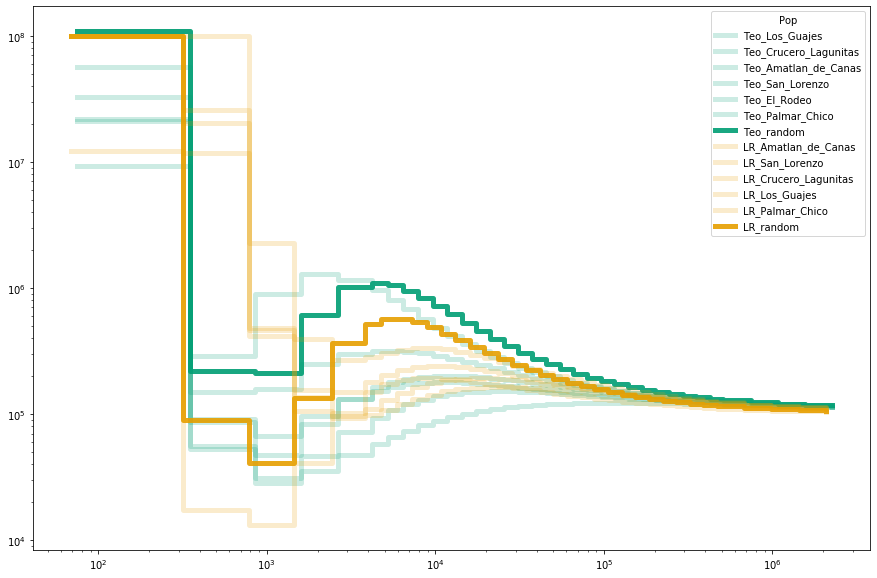

In [15]:
## Visualization ##
teo_clr = "#009E73"
LR_clr = "#E69F00"

plt.figure(figsize=(15,10))
for lab, ms_line in zip(tag, ms_cmd):
    gen_pw, pop_size_pw = parse_msCmd(ms_line)
    if lab[:3] == "Teo":
        hexclr = teo_clr
    elif lab[:2] == "LR":
        hexclr = LR_clr
    if lab[-6:] == "random":
        trans = 0.9
    else:
        trans = 0.2
    plt.step(gen_pw, pop_size_pw, where='post', lw=5, color=hexclr, alpha=trans, label=lab)

plt.yscale("log")
plt.xscale("log")
plt.legend(title="Pop")

In [17]:
## save scaled demography to .param file ##
slim_param_f = "maize"
prec = 2
with open(slim_param_f+"_scale_"+str(scaling_factor)+"_genBP_"+str(max_gen_bp)+".param", "w") as outF:
    print(np.format_float_scientific(scaled_mu, precision=prec), file=outF)
    print(np.format_float_scientific(scaled_rho, precision=prec), file=outF)
    for i in range(len(scaled_gen)):
        print(scaled_gen[i], scaled_pop[i], file=outF)

__Format of `.param` file__

```
<mut_rate>
<recomb_rate>
<gen_1> <Ne_1>
<gen_2> <Ne_2>
<gen_3> <Ne_3>
...
```